<a href="https://colab.research.google.com/github/Uttam580/New_learning-/blob/master/Restaurant_data_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uplaoded = files.upload()

Saving R. Data - 1 tab.xlsx to R. Data - 1 tab.xlsx


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
ls

'R. Data - 1 tab.xlsx'   sample_data/


In [5]:
missing_values = ["n/a", "na", "--"]
sample= pd.read_excel('R. Data - 1 tab.xlsx',na_values = missing_values)
sample.head()

,StoreCode,DTS,Shift,Day Type,Day,Month,Date,Year,Time,TicketCode,PartySize,MenuCateogry,MenuItem,ItemPrice,ItemQty
0,YALEV6B6K3,01/01/2019 11:30AM,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4.0,Starter,GOBI MANCHURIAN,14.0,1
1,YALEV6B6K3,01/01/2019 11:30AM,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4.0,Starter,TASTY FLATBREAD,11.0,1
2,YALEV6B6K3,01/01/2019 11:30AM,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4.0,VEGETABLE SPECIALS,SARSON DA SAAG,15.0,1
3,YALEV6B6K3,01/01/2019 11:30AM,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4.0,VEGETABLE SPECIALS,PANEER VINDALOO,16.0,1
4,YALEV6B6K3,01/01/2019 11:30AM,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4.0,BREADS,GARLIC NAAN,3.5,2


In [6]:
sample.shape

(200, 15)

**EDA**

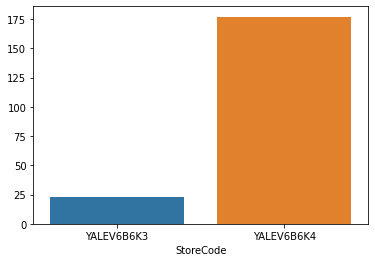

In [7]:
# checking store wise sale 
sns.barplot(sample.groupby('StoreCode')['StoreCode'].count().index ,sample.groupby('StoreCode')['StoreCode'].count().values )

plot we can see that store id YALEV6B6K4 had more customers than YALEV6B6K3)

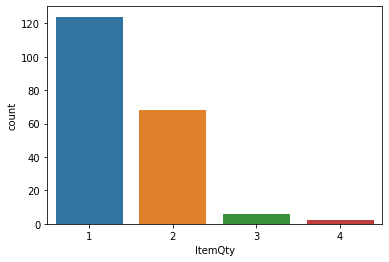

In [8]:
sns.countplot(x= 'ItemQty', data= sample)

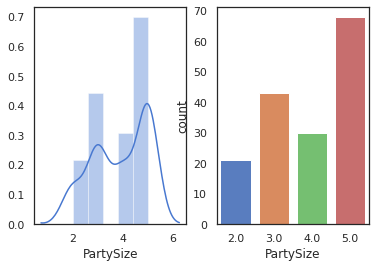

In [9]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 2,)
sns.distplot(sample.PartySize, ax=axes[0])
sns.countplot(x='PartySize', data=sample, ax=axes[1])

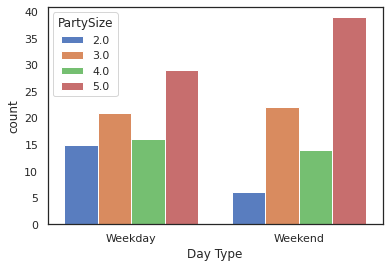

In [10]:
sns.countplot(x= 'Day Type',hue= 'PartySize',data= sample)

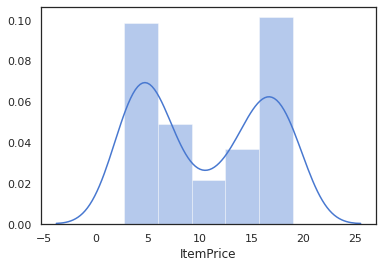

In [11]:
sns.distplot(sample.ItemPrice)


most Itemprices are ranging between approx (2-6) and (15-20)

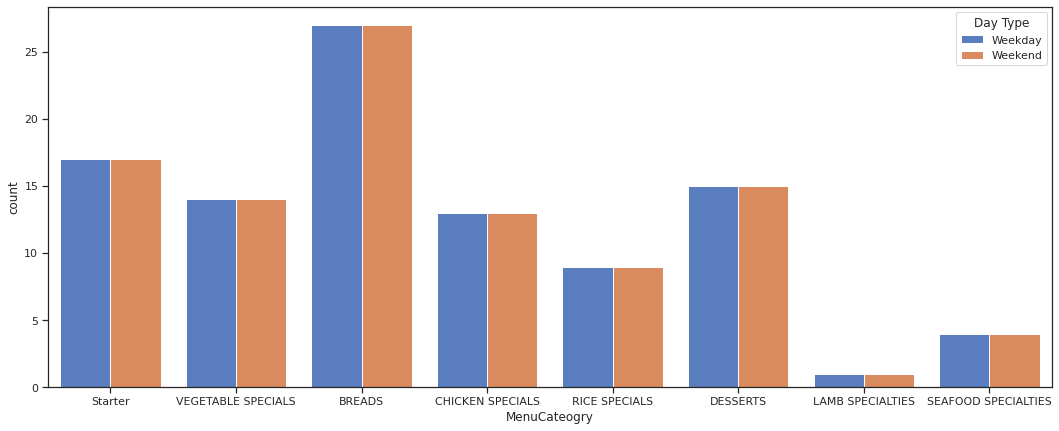

In [12]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(18,7)
sns.countplot(x='MenuCateogry',hue= 'Day Type',data=sample,)

from above visaulization we can see that is no effect on menucategory on weekday and weekend. and BREADS are sold out more than other menucategory item .

In [13]:
sample.MenuCateogry.value_counts() #checking Menucategory

BREADS                 54
Starter                34
DESSERTS               30
VEGETABLE SPECIALS     28
CHICKEN SPECIALS       26
RICE SPECIALS          18
SEAFOOD SPECIALTIES     8
LAMB SPECIALTIES        2
Name: MenuCateogry, dtype: int64

In [14]:
sample[sample.MenuCateogry=="BREADS"].MenuItem.value_counts()

GARLIC NAAN      20
NAAN             10
TANDOORI ROTI     8
ONION KULCHA      8
LACHA PARATHA     4
ALOO PARATHA      2
SPINACH NAAN      2
Name: MenuItem, dtype: int64

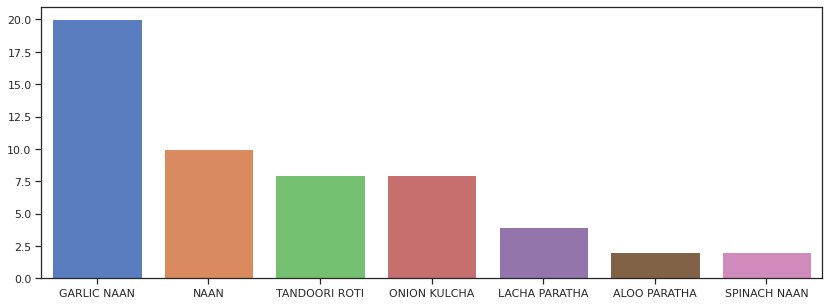

In [15]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(14,5)
sns.barplot(x=sample[sample.MenuCateogry=="BREADS"].MenuItem.value_counts().index,y= sample[sample.MenuCateogry=="BREADS"].MenuItem.value_counts().values)


From above EDA we can conclude below points.

1. store id YALEV6B6K4 had more customers than YALEV6B6K3

2. most of people ordered only one itemquantity(1>2>3>4)

3. most of people came into hotel in size of 5 (5>3>4>2)

4. more people on weekend as compared to weekday(Partysize is same)

In [16]:
sample.isna().any() #chhecking missing values of features. we have missing values in partySize column,

StoreCode       False
DTS             False
Shift           False
Day Type        False
Day             False
Month           False
Date            False
Year            False
Time            False
TicketCode      False
PartySize        True
MenuCateogry    False
MenuItem        False
ItemPrice       False
ItemQty         False
dtype: bool

In [0]:
sample_new = sample.fillna(sample.PartySize.median()) #filling party sie with median 

In [18]:
sample_new.isna().any()

StoreCode       False
DTS             False
Shift           False
Day Type        False
Day             False
Month           False
Date            False
Year            False
Time            False
TicketCode      False
PartySize       False
MenuCateogry    False
MenuItem        False
ItemPrice       False
ItemQty         False
dtype: bool

In [0]:
sample_new.drop(['StoreCode','Year','Time','TicketCode','DTS','Day','Month','Date'],axis=1,inplace=True) #dropping unnecessary columns

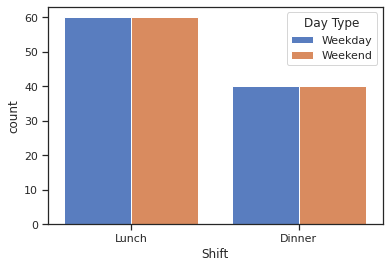

In [20]:
import seaborn as sns
sns.countplot(x='Shift',hue='Day Type',data=sample_new)

**Data gneration for next 6  months**

In [21]:
sample_weekday = sample_new[sample_new['Day Type']=='Weekday']#seperating weekday and weekend columns from dataset 
sample_weekend = sample_new[sample_new['Day Type']=='Weekend']
sample_weekday.shape, sample_weekend.shape  # we have balnaced dataset for weekday and weekend , no need to do samplling

((100, 7), (100, 7))

In [0]:
weekday=pd.DataFrame([]) 
for i in range(129):
  weekday = weekday.append(sample_weekday)

In [0]:
weekend=pd.DataFrame([]) 
for i in range(52):
  weekend = weekend.append(sample_weekend)

In [24]:
weekday.shape, weekend.shape

((12900, 7), (5200, 7))

In [0]:
from datetime import datetime  # date generation based on weekday and wweekend
start = datetime(2019, 1, 1)
end = datetime(2019, 6, 30)
date_sun = pd.date_range(start, end, freq='W-SUN')
date_sat = pd.date_range(start, end, freq='W-SAT')
date_weekday = pd.date_range(start,end, freq='B')
date_weekend= date_sat.union(date_sun)

In [0]:
d = []
for j in range(100):
  for i in range(52):
    d.append(date_weekend[i])
all_weekend_date = pd.DataFrame(d,columns=['date'])

In [0]:
all_weekend_date.sort_values(by='date',inplace=True, ascending=True)

In [0]:
e = []
for j in range(100):
  for i in range(129):
    e.append(date_weekday[i])
all_week_date = pd.DataFrame(e,columns=['date'])
all_week_date.sort_values(by='date',inplace=True, ascending=True)

In [0]:
x11= weekend.reset_index(drop=True) #resetting index for weekend dataframe
x12=all_weekend_date.reset_index(drop=True)  #resetting index for weekend date dataframe
x11['date']=x12 # adding date to weekend dataframe

In [0]:
x21= weekday.reset_index(drop=True) #resetting index for weekday dataframe
x22=all_week_date.reset_index(drop=True)#resetting index for weekday date dataframe
x21['date'] = x22 # adding date to weekday dataframe

In [0]:
final = pd.concat([x11, x21], ignore_index=True)

In [0]:
final.head()
final.to_csv('final_df.csv')

In [0]:
df = pd.read_csv('final_df.csv') 

In [0]:
df['date'] =pd.to_datetime(df['date'])

In [0]:
df['week'] = df['date'].dt.week
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['day_name'] = df['date'].dt.day_name()

In [37]:
df[(df['day_name']=='Friday') & (df['Shift']=='Dinner')].PartySize.value_counts()

5.0    494
3.0    234
4.0    156
2.0    156
Name: PartySize, dtype: int64

In [38]:
df[(df['day_name']=='Sunday') & (df['Shift']=='Dinner')].PartySize.value_counts()

5.0    494
4.0    390
2.0    156
Name: PartySize, dtype: int64

applying sunday dinner patterrn to friday dinner pattern 

In [39]:
df_fri_dinner = df[(df['day_name']=='Friday') & (df['Shift']=='Dinner')  & (df['PartySize']==3.0)]
df_fri_dinner

,Unnamed: 0,Shift,Day Type,PartySize,MenuCateogry,MenuItem,ItemPrice,ItemQty,date,week,month,year,day_name
5560,5560,Dinner,Weekday,3.0,Starter,FISH PAKORA,14.00,2,2019-01-04,1,1,2019,Friday
5561,5561,Dinner,Weekday,3.0,Starter,SHRIMP STRIPS,15.00,2,2019-01-04,1,1,2019,Friday
5562,5562,Dinner,Weekday,3.0,SEAFOOD SPECIALTIES,FISH KORMA,19.00,1,2019-01-04,1,1,2019,Friday
5563,5563,Dinner,Weekday,3.0,SEAFOOD SPECIALTIES,FISH CURRY,19.00,2,2019-01-04,1,1,2019,Friday
5564,5564,Dinner,Weekday,3.0,RICE SPECIALS,RICE,5.00,1,2019-01-04,1,1,2019,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18064,18064,Dinner,Weekday,3.0,RICE SPECIALS,RICE,5.00,1,2019-06-28,26,6,2019,Friday
18065,18065,Dinner,Weekday,3.0,BREADS,GARLIC NAAN,3.50,2,2019-06-28,26,6,2019,Friday
18066,18066,Dinner,Weekday,3.0,BREADS,NAAN,2.75,1,2019-06-28,26,6,2019,Friday
18067,18067,Dinner,Weekday,3.0,DESSERTS,MALPURA,8.00,1,2019-06-28,26,6,2019,Friday


In [40]:
df_fri_dinner_idx=  df_fri_dinner.index
len(df_fri_dinner_idx)

234

In [41]:
df_fri_dinner['PartySize'].replace({3.0:4.0},inplace=True) # replacing all party size 3 to 4 for friday dinner
df_fri_dinner

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Unnamed: 0,Shift,Day Type,PartySize,MenuCateogry,MenuItem,ItemPrice,ItemQty,date,week,month,year,day_name
5560,5560,Dinner,Weekday,4.0,Starter,FISH PAKORA,14.00,2,2019-01-04,1,1,2019,Friday
5561,5561,Dinner,Weekday,4.0,Starter,SHRIMP STRIPS,15.00,2,2019-01-04,1,1,2019,Friday
5562,5562,Dinner,Weekday,4.0,SEAFOOD SPECIALTIES,FISH KORMA,19.00,1,2019-01-04,1,1,2019,Friday
5563,5563,Dinner,Weekday,4.0,SEAFOOD SPECIALTIES,FISH CURRY,19.00,2,2019-01-04,1,1,2019,Friday
5564,5564,Dinner,Weekday,4.0,RICE SPECIALS,RICE,5.00,1,2019-01-04,1,1,2019,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18064,18064,Dinner,Weekday,4.0,RICE SPECIALS,RICE,5.00,1,2019-06-28,26,6,2019,Friday
18065,18065,Dinner,Weekday,4.0,BREADS,GARLIC NAAN,3.50,2,2019-06-28,26,6,2019,Friday
18066,18066,Dinner,Weekday,4.0,BREADS,NAAN,2.75,1,2019-06-28,26,6,2019,Friday
18067,18067,Dinner,Weekday,4.0,DESSERTS,MALPURA,8.00,1,2019-06-28,26,6,2019,Friday


In [0]:
df.drop(df_fri_dinner_idx,inplace=True)

In [43]:
df.shape #friday_dinner column dropped

(17866, 13)

In [0]:
all_df = pd.concat([df, df_fri_dinner], ignore_index=True)

In [45]:
all_df[(all_df['day_name']=='Friday') & (all_df['Shift']=='Dinner') & (all_df['PartySize']==3.0)]  # fiday dinner party size data size manuplated successfully 

,Unnamed: 0,Shift,Day Type,PartySize,MenuCateogry,MenuItem,ItemPrice,ItemQty,date,week,month,year,day_name


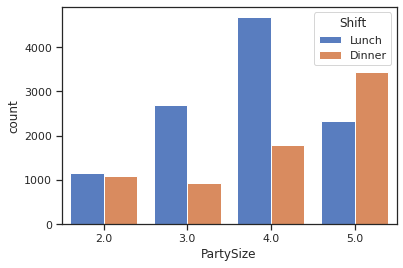

In [46]:
sns.countplot(x='PartySize', hue='Shift' ,data=all_df)

In [47]:
all_df.head()

,Unnamed: 0,Shift,Day Type,PartySize,MenuCateogry,MenuItem,ItemPrice,ItemQty,date,week,month,year,day_name
0,0,Lunch,Weekend,3.0,BREADS,ONION KULCHA,5.0,1,2019-01-05,1,1,2019,Saturday
1,1,Lunch,Weekend,3.0,RICE SPECIALS,RICE,5.0,1,2019-01-05,1,1,2019,Saturday
2,2,Lunch,Weekend,3.0,Starter,TASTY FLATBREAD,11.0,2,2019-01-05,1,1,2019,Saturday
3,3,Lunch,Weekend,3.0,CHICKEN SPECIALS,CHICKEN TIKKA MASALA,18.0,1,2019-01-05,1,1,2019,Saturday
4,4,Lunch,Weekend,3.0,VEGETABLE SPECIALS,SHAHI PANEER,16.0,1,2019-01-05,1,1,2019,Saturday


Belwo wordcloud shows most frequently ordered menuitem and MenuCategory 

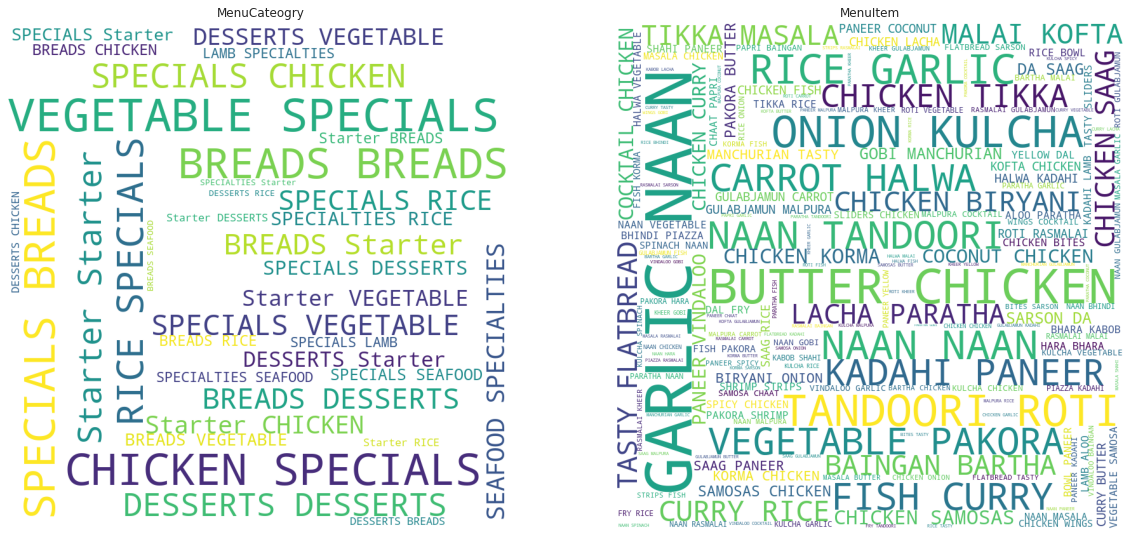

In [48]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud # wordcloud
fig, ax = plt.subplots(1, 2, figsize=(20,40))# plotting two subplots 
wordcloud = WordCloud(background_color='white',width=800, height=800).generate(' '.join(all_df['MenuCateogry']))
wordcloud_sub = WordCloud(background_color='white',width=800, height=800).generate(' '.join(all_df['MenuItem'].dropna().astype(str)) ) # used astype(str)bbecause data is not present as str
ax[0].imshow(wordcloud)
ax[0].axis('off')
ax[0].set_title('MenuCateogry')
ax[1].imshow(wordcloud_sub)
ax[1].axis('off')
ax[1].set_title('MenuItem')
plt.show()

In [49]:
all_df.shape

(18100, 13)

This is our final data for 6 momnths , added friday dinner pattern as wekkend dinner pattern 

In [52]:
all_df.groupby(['day_name', 'Shift','PartySize'])[['PartySize']].count()

PartySize
day_name  Shift  PartySize           
Friday    Dinner 2.0              156
                 4.0              390
                 5.0              494
          Lunch  2.0              234
                 3.0              312
                 4.0              754
                 5.0              260
Monday    Dinner 2.0              150
                 3.0              225
                 4.0              150
                 5.0              475
          Lunch  2.0              225
                 3.0              300
                 4.0              725
                 5.0              250
Saturday  Dinner 2.0              156
                 4.0              390
                 5.0              494
          Lunch  3.0              572
                 4.0              468
                 5.0              520
Sunday    Dinner 2.0              156
                 4.0              390
                 5.0              494
          Lunch  3.0              572
                 4.0              468
                 5.0              520
Thursday  Dinner 2.0              156
                 3.0              234
                 4.0              156
                 5.0              494
          Lunch  2.0              234
                 3.0              312
                 4.0              754
                 5.0              260
Tuesday   Dinner 2.0              156
                 3.0              234
                 4.0              156
                 5.0              494
          Lunch  2.0              234
                 3.0              312
                 4.0              754
                 5.0              260
Wednesday Dinner 2.0              156
                 3.0              234
                 4.0              156
                 5.0              494
          Lunch  2.0              234
                 3.0              312
                 4.0              754
                 5.0              260

Above pattern shows the PartySize for dinner and Lunch for different -different week day name.we
 have generated data in such a ways that we have more people on friday dinner and sat and sunday .  
 

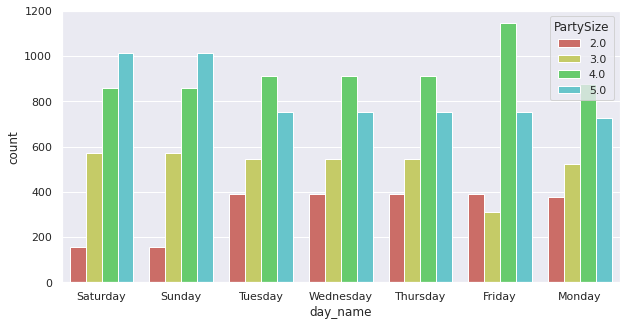

In [53]:
sns.set(style='darkgrid')
sns.set_palette('hls')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10,5)
sns.countplot(x= 'day_name', hue='PartySize', data=all_df) # we have increased Dinner partysize more for friday .

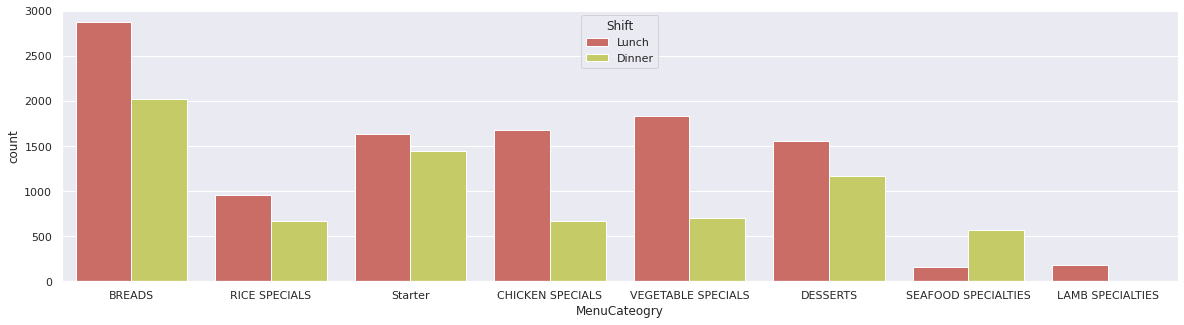

In [54]:
sns.set(style='darkgrid')
sns.set_palette('hls')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20,5)
sns.countplot(x= 'MenuCateogry',hue='Shift' ,data=all_df)

Most frequetly serverd item is BREADS , irrespective of shift(Dinner or Lunch)

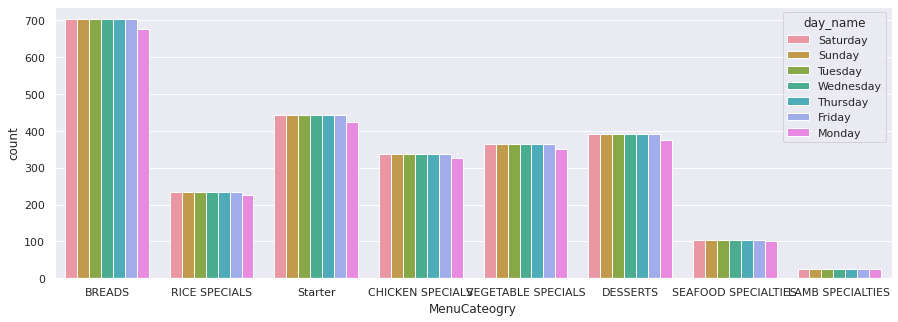

In [55]:
sns.set(style='darkgrid')
sns.set_palette('hls')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15,5)
sns.countplot(x= 'MenuCateogry',hue='day_name',data=all_df)

above diagram shows that most serverd item is BREAD , it is highly served irrespetive of day_name(monday/fri/sat/sun etc)

In [0]:
all_df.drop(['Unnamed: 0','week','month','year'],axis= 1, inplace=True)

In [57]:
day_grp_by = all_df[all_df['date']=='2019-01-05'].groupby(['Shift','MenuItem'])[['ItemQty']].agg('sum')
day_grp_by

ItemQty
Shift  MenuItem                                   
Dinner BUTTER CHICKEN                            1
       CHICKEN KORMA                             1
       CHICKEN TIKKA MASALA                      1
       COCKTAIL CHICKEN SAMOSAS                  1
       FISH KORMA                                1
       FISH PAKORA                               2
       GARLIC NAAN                              11
       GOBI MANCHURIAN                           3
       GULABJAMUN                                4
       KADAHI PANEER                             3
       MALPURA                                   1
       MASALA CHICKEN WINGS                      1
       NAAN                                      7
       ONION KULCHA                              5
       PANEER VINDALOO                           2
       RASMALAI                                  1
       RICE                                      3
       SARSON DA SAAG                            2
       SPICY CHICKEN BITES                       1
       SPINACH NAAN                              1
       TANDOORI ROTI                             1
       TASTY SLIDERS : CHICKEN PANEER            1
       VEGETABLE SAMOSA                          1
Lunch  ALOO PARATHA                              1
       BAINGAN BARTHA                            2
       BHINDI DO PIAZZA                          1
       BUTTER CHICKEN                            7
       CARROT HALWA                              3
       CHAAT PAPRI                               2
       CHICKEN BIRYANI                           3
       CHICKEN KORMA                             1
       CHICKEN SAAG                              3
       CHICKEN TIKKA MASALA                      1
       COCKTAIL CHICKEN SAMOSAS                  2
       COCONUT CHICKEN CURRY                     2
       FISH CURRY                                5
       GARLIC NAAN                               8
       GULABJAMUN                                1
       HARA BHARA KABOB                          1
       KADAHI LAMB                               1
       KADAHI PANEER                             1
       KHEER                                     3
       LACHA PARATHA                             5
       MALAI KOFTA                               4
       MALPURA                                   2
       NAAN                                      3
       ONION KULCHA                              1
       RASMALAI                                  3
       RICE                                      4
       SHAHI PANEER                              1
       SHRIMP STRIPS                             2
       TANDOORI ROTI                             5
       TASTY FLATBREAD                           3
       TIKKA RICE BOWL : PANEER | CHICKEN        2
       VEGETABLE PAKORA                          4
       YELLOW DAL FRY                            1